In [1]:
source("random_forests_with_missing_values.R")
source("plot_regtree_and_forest.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: iterators

Loading required package: parallel

corrplot 0.84 loaded



We read the data and introduce three observations with missing value.
The data consists in the Anderson's iris dataset.
We are going to use the Petal Length and the Sepal Length to Predict the Petal Width.

In [2]:
# Load data 
XX1 <- iris$Petal.Length
XX2 <- iris$Sepal.Length

# Introducing missing values in the data
XX1 <- c(XX1, 1.5, 6, NA)
XX2 <- c(XX2, NA, NA, 7)

XX <- cbind(XX1,XX2)
XX <- as.data.frame(XX)
colnames(XX) <- c('Petal Length', 'Sepal Length')
yy <- iris$Petal.Width
yy <- c(yy, 0.25, 3, 1.53)
yy_name <- 'Petal Width'

With the following instructions we can create a Non-random tree using the version of the CART criterion that allows missing values.

In [3]:
# The usual tree
miss_iris_tree <- miss_regTree_RF(XX, yy, random = FALSE, nodesize = 50)

Warning message in valid_data(X, y, random, mtry, X_space):
“There were missing Observations in a tree.”


In [4]:
# Structure of the tree
miss_iris_tree$Structure

node,Split_h,Split_z,size,MSE,ypred,CART,L1,L2,L3,L4,leaf,Prob_miss
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Petal Length,2.45,153,0.594,1.207,0.462,0.461,NaN,0,NaN,FALSE,1
2,Sepal Length,4.95,51,0.011,0.246,0.002,0.002,NaN,0,NaN,FALSE,0
3,Petal Length,4.75,102,0.192,1.688,0.12,0.12,NaN,0,NaN,FALSE,1
4,NaN,NaN,20,0.003,0.195,NaN,NaN,NaN,NaN,NaN,TRUE,0
5,NaN,NaN,31,0.013,0.279,NaN,NaN,NaN,NaN,NaN,TRUE,1
6,NaN,NaN,46,0.034,1.305,NaN,NaN,NaN,NaN,NaN,TRUE,1
7,Petal Length,5.15,56,0.103,2.002,0.023,0.023,NaN,0,NaN,FALSE,0
14,NaN,NaN,21,0.063,1.805,NaN,NaN,NaN,NaN,NaN,TRUE,0
15,NaN,NaN,35,0.09,2.12,NaN,NaN,NaN,NaN,NaN,TRUE,0


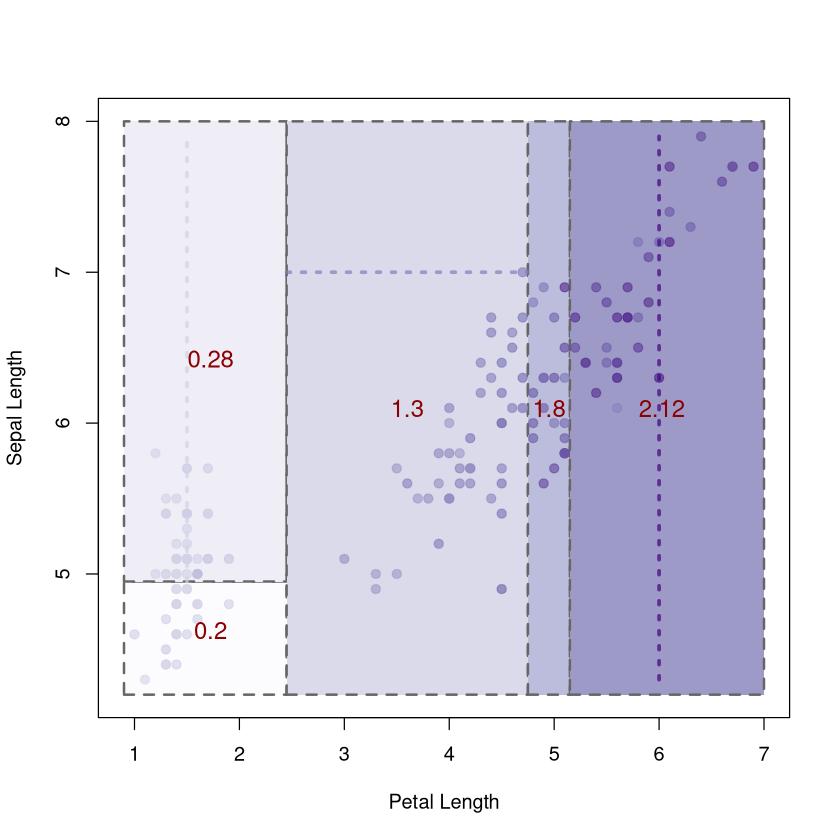

In [5]:
# Plot the tree
miss_tree.plot(miss_iris_tree)

Normally the next two cell plot the tree in 3D in an interative window. However it is not working in Jupyter Notebook.
Moreover, plotting in 3D requires a lot of computer resources, even while the plots look nice and could be use in class to explain random forests, it is better to avoid plotting in 3D.

I add an image with the plots in 3D.

In [6]:
# Plot the tree in 3D
#miss_tree.plot(tree = miss_iris_tree, y_name = yy_name, in2D = FALSE, add = FALSE)

<img src="usual_iris_tree.png">

In [7]:
# Plot the tree in 3D and add the observations
#miss_tree.plot(tree = miss_iris_tree, y_name = yy_name, in2D = FALSE, rad = 0.2)

<img src="usual_iris_tree_with_points.png">

We can calculate and plot the conecction matrix of the tree

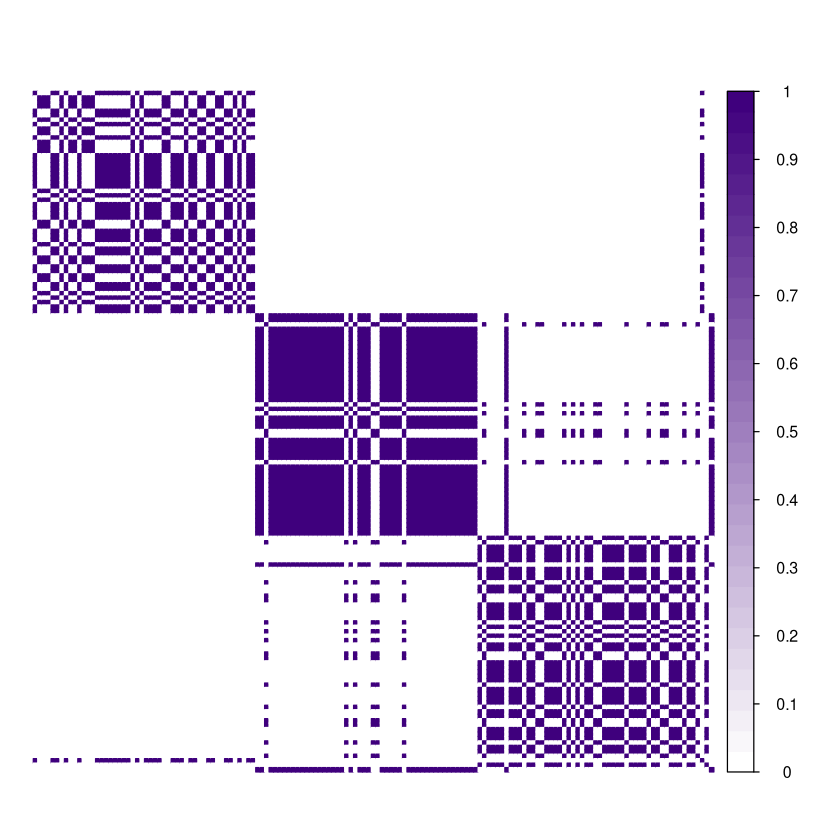

In [8]:
# Calculate and plot the connectivity matrix
connect_matrix <- miss_tree.conect(tree = miss_iris_tree)
matrix.plot(connect_matrix)

We can see for a new observations to which points it is connected.

In [9]:
miss_tree.conect(x = c(2,6), tree = miss_iris_tree)

[1] 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 [38] 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 1 0 0

We can predict, even for observations with missing values. For observations with missing values, it is done stochastically, so the prediction might change. We select a random one child node using the probabilities of missingness for that variable. If we can not assigned to a child node, which can occur if there were no missing values for that feature and that cell, then prediction is done with the prediction at the current cell.

In [10]:
# Prediction with the tree
miss_tree.pred(x = c(2,4.5),  tree = miss_iris_tree)$y_pred
miss_tree.pred(x = c(6,NA),   tree = miss_iris_tree)$y_pred
miss_tree.pred(x = c(NA,4.5), tree = miss_iris_tree)$y_pred
miss_tree.pred(x = c(2,NA),   tree = miss_iris_tree)$y_pred

[1] 0.195

[1] 2.12

[1] 1.305

[1] 0.279

With the next instruction we can create a random tree.

Warning message in valid_data(X, y, random, mtry, X_space):
“There were missing Observations in a tree.”


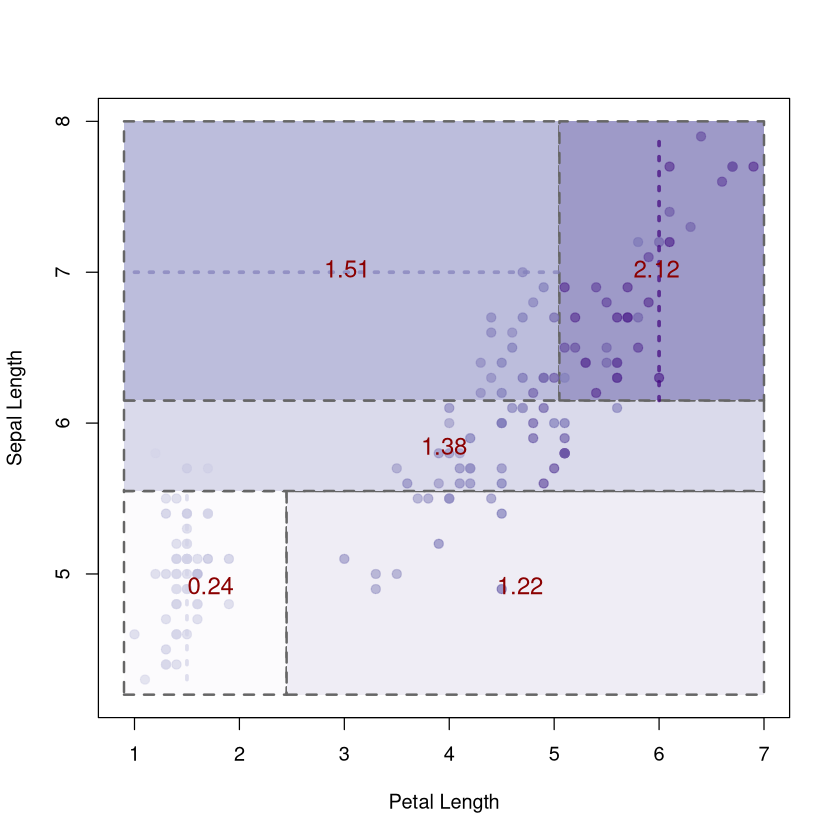

In [11]:
# A random tree
set.seed(111)
miss_iris_random_tree <- miss_regTree_RF(XX, yy, nodesize = 50)
miss_tree.plot(miss_iris_random_tree)

## Random Forests

Random forests are built in parallel. Thus, the first thing to do is to initialize the cluster.

In [12]:
# Forest
numCores <- detectCores()
cl <- parallel::makeCluster(numCores, setup_strategy = "sequential")
registerDoParallel(cl)

The next instruction builds a random forest.

In [13]:
set.seed(111)
miss_iris_random_forest <- miss_regRF(XX, yy, nodesize = 50)

Warning message in valid_data(X, y, random = TRUE, mtry, X_space):
“There were missing Observations in a tree.”


We can know if we have enough trees using the OOB error, the next instructions calculate and plot the OOB error.

In [14]:
# The OOB error
miss_iris_random_forest$OOB.err <- miss_oob.err(miss_iris_random_forest)

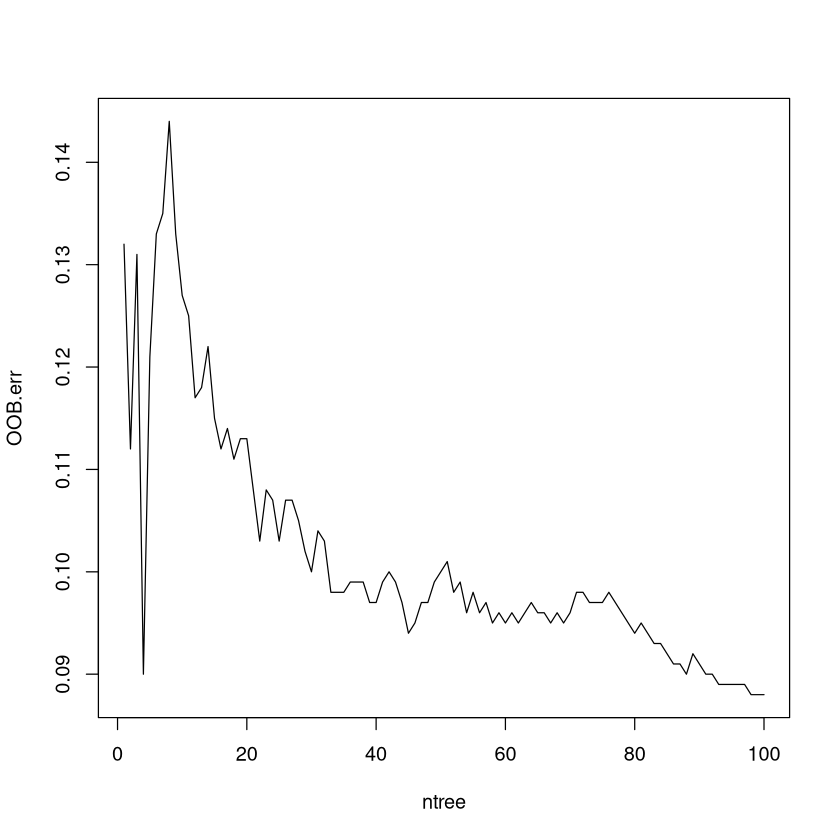

In [15]:
plot(round(miss_iris_random_forest$OOB.err,3), type = 'l', ylab = 'OOB.err', xlab = 'ntree')

We can easily add more trees to the forest with the following instructions.
Again, we calculate the OOB error to see if those are enought trees.

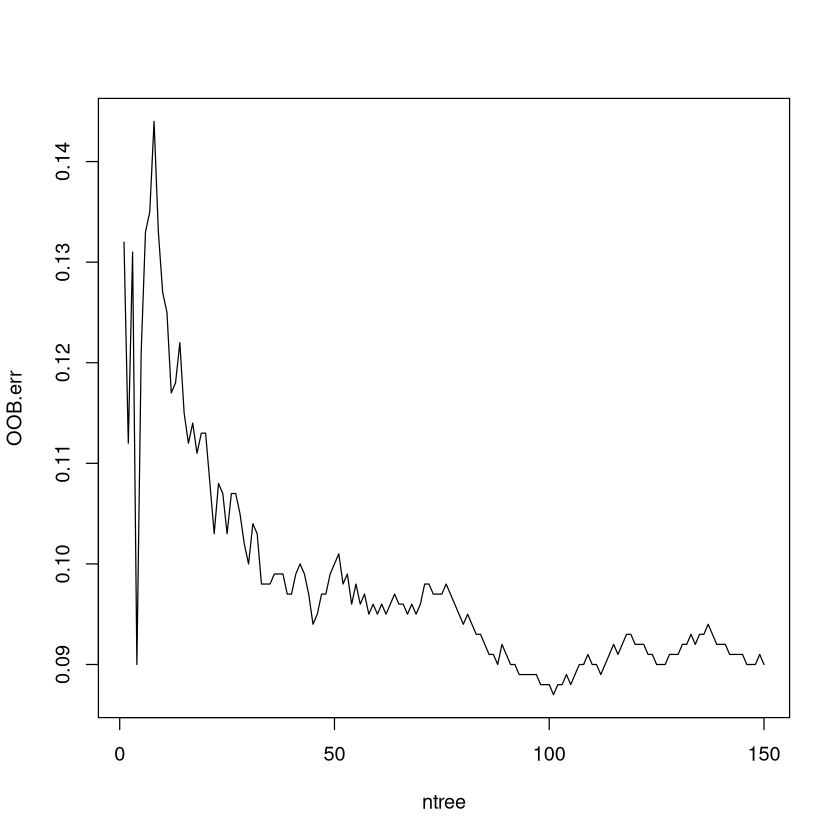

In [16]:
# Add some trees to the forest
inn <- increase(miss_iris_random_forest, 50)
miss_iris_random_forest$OOBmatrix <- inn$new.OOB
for (k in 1:50){
  miss_iris_random_forest$trees <- list.append(
    miss_iris_random_forest$trees, inn$new.trees[[k]]
    )
}

miss_iris_random_forest$OOB.err <- miss_oob.err(miss_iris_random_forest)

plot(round(miss_iris_random_forest$OOB.err,3), type = 'l', ylab = 'OOB.err', xlab = 'ntree')

If we have more than necessary trees, we can eliminate some of them to avoid using more computer resources, with the next instructions we eliminate the trees from the number 101 to 150.

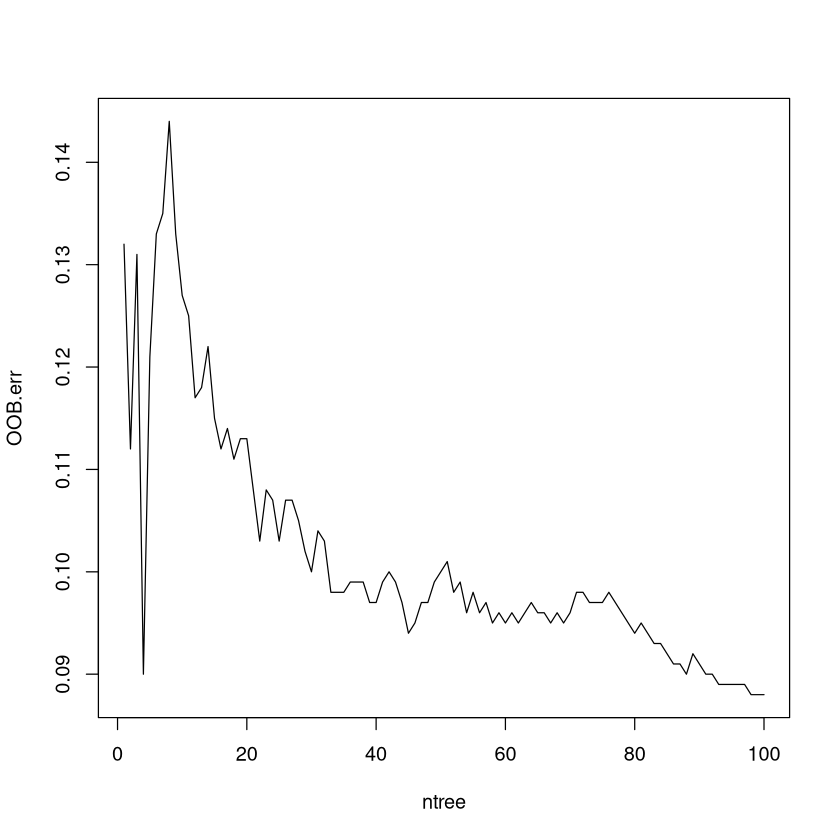

In [17]:
# Remove some trees to the forest
decc <- decrease(miss_iris_random_forest, rem = 101:150)
miss_iris_random_forest$trees <- decc$new.trees
miss_iris_random_forest$OOBmatrix <- decc$new.OOB

miss_iris_random_forest$OOB.err <- miss_oob.err(miss_iris_random_forest)

plot(round(miss_iris_random_forest$OOB.err,3), type = 'l', ylab = 'OOB.err', xlab = 'ntree')

Random forests can only be plot in 3D. This requires to much computer resources and should be avoided, unless we really want to plot the it.

In [18]:
# Plot the forest
#miss_RF.plot(miss_iris_random_forest, y_name = yy_name, add = FALSE)

<img src="iris_random_forest.png">

In [19]:
# Plot the forest and add the observations
#miss_RF.plot(miss_iris_random_forest, y_name = yy_name, rad = 0.2)

<img src="iris_random_forest_with_points.png">

Prediction of new observations using the forest.

In [20]:
# Prediction with the forest
miss_RF.pred(x = c(2,4.5),  forest = miss_iris_random_forest)
miss_RF.pred(x = c(6,NA),   forest = miss_iris_random_forest)
miss_RF.pred(x = c(NA,4.5), forest = miss_iris_random_forest)
miss_RF.pred(x = c(2,NA),   forest = miss_iris_random_forest)

[1] 0.3329

[1] 1.63704

[1] 0.90387

[1] 0.62597

We can calculate (and plot) the proximity matrix.

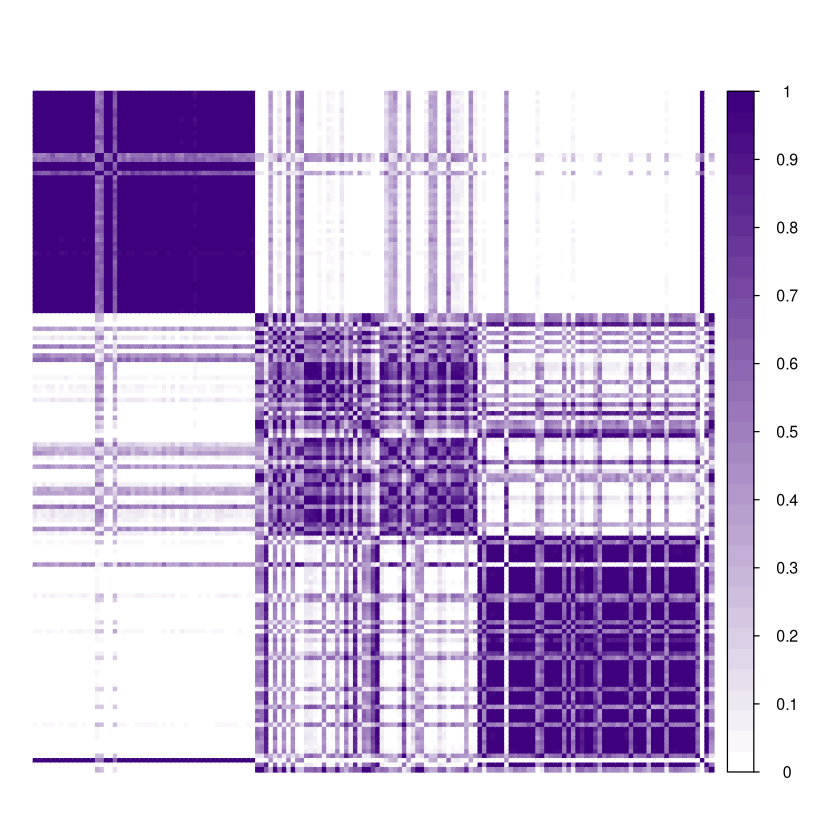

In [21]:
# Proximity matrix 
prox_matrix <- miss_RF.proximity(forest = miss_iris_random_forest)
matrix.plot(prox_matrix)

In [22]:
stopCluster(cl)